In [1]:
import utils
import matplotlib.pyplot as plt
from utils import Logger
import numpy as np

In [2]:
def print_params(dat):
    def _print(prm):
        try:
            print(prm + ": " + str(dat["params"][prm]))
        except:
            print(prm + ": N/A")

    _print("nn_model")
    _print("topology")
    _print("initialize_weight_same")
    _print("num_labels_ag")
    _print("distribution")
    _print("num_train_data")
    _print("num_shared")
    _print("learning_rate")
    _print("learning_rate_codis")
    #_print("codis_iter")
    #print("time:" + dat["data"]["time"][-1])
    #print("lap time:" + dat["data"]["time"][-1]/len(dat["data"]["time"]))

def ax_plot(ax, dat, key, l, yrange=None):
    d = np.array(dat["data"][key][0:l])
    if yrange is not None:
        ax.set_ylim(yrange)
    for y in d.transpose():
        ax.plot(y, label="{0:3.5}".format(y[-1]))
    y = np.mean(d,axis=1)
    ax.plot(y, label="{0:3.5}[avg]".format(y[-1]), color="black")
    ax.legend()

def show(dat, l=None):
    if l is None:
        l = len(dat["data"]["train_accuracy"])
    print("train acc, loss")
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    ax_plot(ax[0], dat, "train_accuracy", l)
    ax_plot(ax[1], dat, "train_loss", l)
    plt.show()
    print("validation acc, loss")
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    ax_plot(ax[0], dat, "valid_accuracy", l, yrange=(0,1))
    ax_plot(ax[1], dat, "valid_loss", l)
    plt.show()
    print("codis loss")
    ax_plot(plt, dat, "codis_loss", l)
    plt.show()

In [3]:
mdat = utils.PickleUtil.load_data("results/mnist.dat")
fdat = utils.PickleUtil.load_data("results/fashion.dat")
cdat = utils.PickleUtil.load_data("results/cifar10.dat")

In [4]:
print("MNIST")
print_params(mdat)
print()
print("F-MNIST")
print_params(fdat)
print()
print("CIFAR10")
print_params(cdat)

MNIST
nn_model: model_0
topology: onehop
initialize_weight_same: False
num_labels_ag: 2
distribution: N/A
num_train_data: 10000
num_shared: 1000
learning_rate: 0.01
learning_rate_codis: 0.2

F-MNIST
nn_model: model_0
topology: onehop
initialize_weight_same: False
num_labels_ag: 2
distribution: N/A
num_train_data: 10000
num_shared: 1000
learning_rate: 0.01
learning_rate_codis: 0.2

CIFAR10
nn_model: model_0
topology: onehop
initialize_weight_same: False
num_labels_ag: 2
distribution: None
num_train_data: 40000
num_shared: 10000
learning_rate: 0.1
learning_rate_codis: 0.2


MNIST
train acc, loss


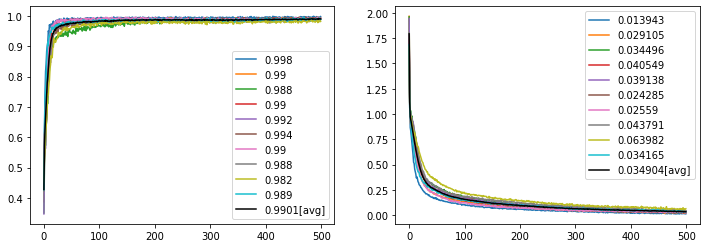

validation acc, loss


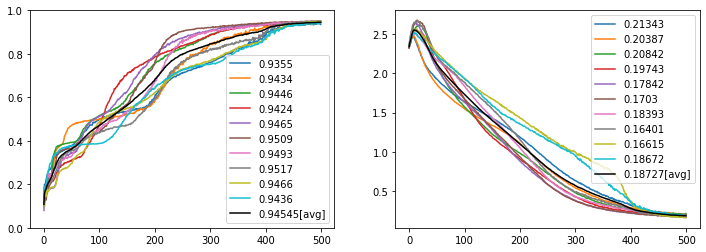

codis loss


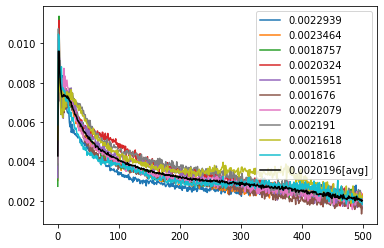

In [5]:
print("MNIST")
show(mdat)

F-MNIST
train acc, loss


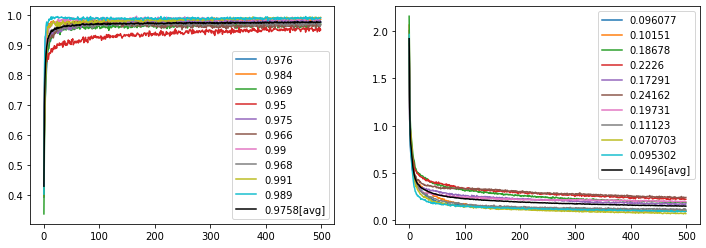

validation acc, loss


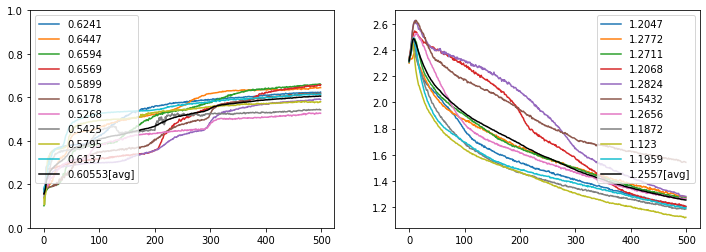

codis loss


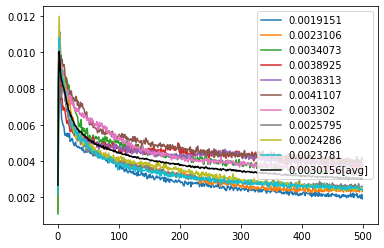

In [6]:
print("F-MNIST")
show(fdat)

CIFAR10
train acc, loss


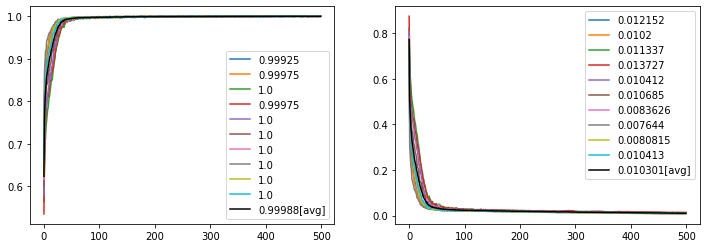

validation acc, loss


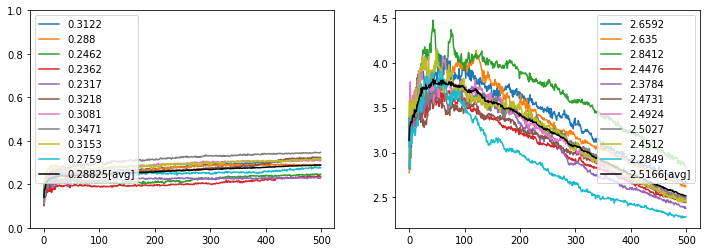

codis loss


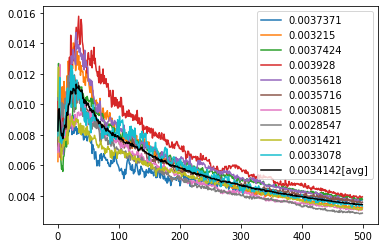

In [7]:
print("CIFAR10")
show(cdat)